# EOS 523 Assignment 1 Final Answers

### by Theron Finley

*Note that this Jupyter notebook is designed to run in an environment with Python 3.7, ObsPy 1.2, PyGMT 0.5, and GDAL 3.4 installed.

### 1: Use Obspy to generate an inventory object of stations for a given region (client get_stations). Plot a station map of that region

Select web service client from which to get data. Options are here: https://docs.obspy.org/packages/obspy.clients.fdsn.html

In [1]:
import obspy
from obspy.clients.fdsn import Client
# select the IRIS web service
client = Client('IRIS')

I will examine the second of two earthquakes (M6.2 and M6.3 respectively) that struck the southern segment of the Eastern Denali fault on May 1, 2017: 
* M6.2 at 12:31 UTC https://earthquake.usgs.gov/earthquakes/eventpage/us10008mel/executive
* M6.3 at 14:18 UTC: https://earthquake.usgs.gov/earthquakes/eventpage/us10008mgu/executive

In [2]:
# query IRIS catalog to find events of interest within the given study region. Impose limit for a fast search.
eventcat = client.get_events(minmagnitude=6, maxmagnitude=7, minlatitude=57, maxlatitude=62, minlongitude=-142, maxlongitude=-133, limit=3)
print(eventcat)

3 Event(s) in Catalog:
2017-05-01T14:18:15.290000Z | +59.830, -136.704 | 6.2 Ml
2017-05-01T12:31:55.290000Z | +59.830, -136.676 | 6.2 Mww
2014-07-25T10:54:49.720000Z | +58.306, -136.960 | 6.0 MW


We've confirmed that the event we are interested in is the first entry in the catalog. Now we will extract some metadata that will be uesful later.

In [3]:
event = eventcat[0] #define our event as the first entry in the catalog
origin = event.origins[0] #define origin object for the event (focal time, hypocenter location)
print(event)
print(origin.time) #time in UTC
print(origin.latitude)
print(origin.longitude)
print(origin.depth/1000) #depth in km

Event:	2017-05-01T14:18:15.290000Z | +59.830, -136.704 | 6.2 Ml

	            resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=10118434")
	             event_type: 'earthquake'
	    preferred_origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=21634804")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=179217448")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements
2017-05-01T14:18:15.290000Z
59.8295
-136.7042
2.53


Based on the event metadata, we will create an inventory object for stations that were recording in the vicinity.

In [11]:
#query station catalog for stations within 1 degree radius of event origin, between the origin time and 100 seconds after
inventory = client.get_stations(longitude=origin.longitude, latitude=origin.latitude, minradius=0, maxradius=2, starttime=origin.time, endtime=origin.time+100, channel="?HZ", level="response") #only want stations with high and low gain seismometers with vertical components
print(inventory)

Inventory created at 2022-02-03T19:31:05.537000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2017-05-01...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (6):
			7C, AK, AT, CN, PN, TA
		Stations (31):
			7C.MM04 (Crag Lake, YT, Canada)
			7C.MM05 (Jakes Corner, YT, Canada)
			7C.MM06 (Johnsons Crossing, YT, Canada)
			AK.BCP (Bancas Point, AK, USA)
			AK.BESE (Bessie Mountain, AK, USA)
			AK.DCPH (Deception Hills, AK, USA)
			AK.JIS (Juneau Island, AK, USA)
			AK.PIN (Pinnacle, AK, USA)
			AK.PNL (Peninsula, AK, USA)
			AT.SKAG (Skagway, Alaska)
			AT.YKU2 (Yakutat, Alaska)
			CN.HYT (Haines Jct., YT, CA)
			CN.PLBC (Pleasant Camp, BC, CA)
			CN.WHY (Whitehorse, YT, CA)
			CN.YUK4 (Talbot Arm, YT, CA)
			CN.YUK5 (Granite Creek, YT, CA)
			CN.YUK6 (Outpost Mountain, YT, CA)
			CN.YUK7 (Dusty Glacier, YT, CA)
			PN.SKGA (Skagway High School, Skagway, AK, USA)
			TA.N30M (Aishikik Lake, Yu

In [12]:
#just some examples of information contained within the inventory file structure.
print(inventory[0]) #metadata for the first network in inventory
print(inventory[0][0]) #metadata for the first station in the first network
print(inventory[0][0][0]) #metadata for the first channel in the first station in the first network

Network 7C (The Mackenzie Mountains Transect: Active Deformation from Margin to Craton (Mackenzie Mountains))
	Station Count: 3/40 (Selected/Total)
	2015-01-01T00:00:00.000000Z - 2019-12-31T23:59:59.999900Z
	Access: open
	Contains:
		Stations (3):
			7C.MM04 (Crag Lake, YT, Canada)
			7C.MM05 (Jakes Corner, YT, Canada)
			7C.MM06 (Johnsons Crossing, YT, Canada)
		Channels (9):
			7C.MM04..BHZ, 7C.MM04..HHZ, 7C.MM04..LHZ, 7C.MM05..BHZ, 
			7C.MM05..HHZ, 7C.MM05..LHZ, 7C.MM06..BHZ, 7C.MM06..HHZ, 
			7C.MM06..LHZ
Station MM04 (Crag Lake, YT, Canada)
	Station Code: MM04
	Channel Count: 3/23 (Selected/Total)
	2015-08-05T00:00:00.000000Z - 2018-12-31T23:59:59.999900Z
	Access: open 
	Latitude: 60.24, Longitude: -134.55, Elevation: 840.0 m
	Available Channels:
		MM04..BHZ, MM04..HHZ, MM04..LHZ
Channel 'BHZ', Location '' 
	Time range: 2015-08-05T00:00:00.000000Z - 2018-12-31T23:59:59.000000Z
	Latitude: 60.24, Longitude: -134.55, Elevation: 840.0 m, Local Depth: 0.0 m
	Azimuth: 0.00 degrees from

For the purpose of plotting with PyGMT, I will convert the inventory object to a tabulated format. Note that another way to do this (and probably the more efficient way) is to use loop in the PyGMT command to iterate through the stations in the inventory - I just didn't have time to figure this out.

In [13]:
# write the inventory to a shapefile format
inventory.write("station_inventory.shp", format="SHAPEFILE")

To convert shapefile to CSV, run this GDAL script in Terminal command line (won't run in-line here). Make sure the terminal is in the correct virtual environment:

In [ ]:
# ogr2ogr -f CSV station_inventory.csv station_inventory.shp

Now I will check that this conversion worked properly

In [14]:
import pandas as pd
stations = pd.read_csv("station_inventory.csv", skipinitialspace=True)
print(stations)

   Network Station   Longitude   Latitude  Elevation   StartDate     EndDate  \
0       7C    MM04 -134.550900  60.240000      840.0  2015/08/05  2018/12/31   
1       7C    MM05 -133.986400  60.341200      831.0  2015/08/07  2018/12/31   
2       7C    MM06 -133.306000  60.483400      715.0  2015/08/06  2018/12/31   
3       AK     BCP -139.636900  59.953400      421.8  2011/08/15         NaN   
4       AK    BESE -134.855900  58.579200      867.0  2003/09/20         NaN   
5       AK    DCPH -138.215393  59.090599      674.0  2002/08/03         NaN   
6       AK     JIS -134.384796  58.275799       10.0  2001/04/11         NaN   
7       AK     PIN -140.252502  60.095901      975.0  2003/05/28         NaN   
8       AK     PNL -139.401398  59.667000      586.0  2001/08/16         NaN   
9       AT    SKAG -135.328964  59.460098      134.0  2004/10/13         NaN   
10      AT    YKU2 -139.671036  59.512100       10.1  2009/08/26         NaN   
11      CN     HYT -137.507200  60.82670

And now I will plot the station map using PyGMT

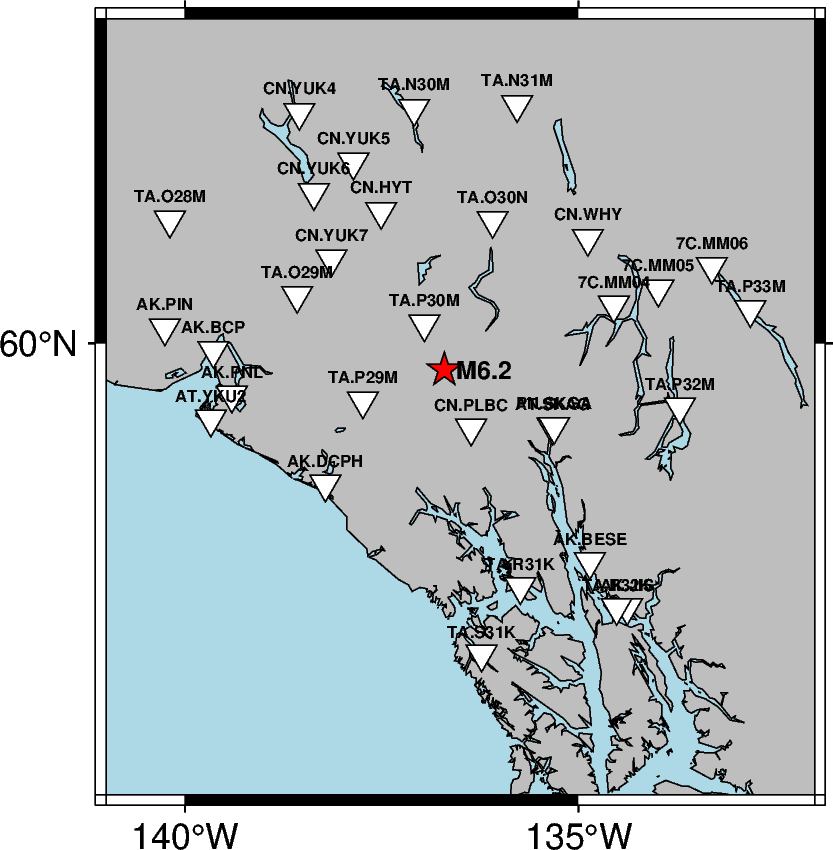

In [26]:
import pygmt

fig1 = pygmt.Figure()

fig1.coast(region=[-141, -132, 57, 62], projection="M6c", land="grey", water="lightblue", shorelines=True, frame="a")
fig1.plot(x=stations.Longitude, y=stations.Latitude, color="white", style="i0.3c", pen="black") #plot inverted triangles for stations
fig1.text(x=stations.Longitude, y=stations.Latitude + 0.15, text=stations.Network + '.' + stations.Station, font="4p,Helvetica-Bold") #plot network.station labels, offset above triangles
fig1.plot(x=origin.longitude, y=origin.latitude, color="red", style="a0.3c", pen="black") #plot epicentral location with star
fig1.text(x=origin.longitude + 0.5, y=origin.latitude, text="M6.2", font="6p,Helvetica-Bold") #label earthquake magnitude

fig1.show()

### 2: Select either a local or distant event for that set of stations, and compute the approximate arrival times for the first arriving phase to each of the stations for that event (using taup).

First calculate the distance in degrees between the event origin and each station in the inventory created in the previous step

In [27]:
from obspy.geodetics import locations2degrees

#get distance in degrees between event origin and coordinates of station in inventory
distance = locations2degrees(origin.latitude, origin.longitude, stations.Latitude, stations.Longitude)
print(distance)

[ 1.1511295   1.44863511  1.81282022  1.47624471  1.56790264  1.06561494
  1.95849211  1.79579227  1.36843383  0.78704056  1.5312689   1.07348972
  0.41168188  1.22737257  1.8418726   1.42090546  1.38262417  1.00065211
  0.79329549  1.64064483  1.71316047  1.96728894  1.04665134  0.98878479
  0.55789335  0.31905455  1.52664745  1.9790799   1.50015887  1.9184465
  1.88374824]


Calculate P wave travetimes from event to stations using 1D velocity model "ak135" after Kennet et al (1995)

In [36]:
from obspy.taup import TauPyModel
model = TauPyModel(model="ak135") #see other model options in taup documentation

firstarrivals=[] #initialize list for first arrivals
arrival_t_utc=[] #initialize list for arrival times in UTC
for distdeg in distance: #iterate through distance list created in previous step
    arrivals = model.get_travel_times(source_depth_in_km=origin.depth/1000, distance_in_degree=distdeg, phase_list=['p', 'P', 'Pg', 'Pn']) #calculate arrivals for a defined list of phases
    firstarrivals.append(arrivals[0].time) #add the first arrival for every station to a list
    arrival_t_utc.append(origin.time + arrivals[0].time) #add the UTC arrival time for every station to a list
print(firstarrivals)
print(arrival_t_utc)

[22.068486194685569, 27.139737528275461, 32.148627467747389, 27.519476488566003, 28.7801227904055, 20.429784710352457, 34.152106561282253, 31.914433913556074, 26.036655252584069, 15.091973906667416, 28.276270063564724, 20.580688953604177, 7.9030694894779305, 23.52954640136263, 32.548198001597015, 26.75834664068001, 26.231828541533957, 19.184947654311006, 15.211813780035321, 29.78059906190483, 30.777953375650231, 34.273091589398518, 20.066395403967128, 18.957546498331759, 10.702403617091774, 6.1310972545907898, 28.212707498681961, 34.435255515684958, 27.848388259304063, 33.601347631314859, 33.124130410199172]
[UTCDateTime(2017, 5, 1, 14, 18, 37, 358486), UTCDateTime(2017, 5, 1, 14, 18, 42, 429738), UTCDateTime(2017, 5, 1, 14, 18, 47, 438627), UTCDateTime(2017, 5, 1, 14, 18, 42, 809476), UTCDateTime(2017, 5, 1, 14, 18, 44, 70123), UTCDateTime(2017, 5, 1, 14, 18, 35, 719785), UTCDateTime(2017, 5, 1, 14, 18, 49, 442107), UTCDateTime(2017, 5, 1, 14, 18, 47, 204434), UTCDateTime(2017, 5, 1, 

Now just to put this into a more human readable format, we'll join the lists of distances, arrivals, and arrivals in UTC to the table of stations we created earlier. I'm sure there is a more efficient way to do this...

In [42]:
s = pd.Series(distance, name="dist_in_deg") #convert list to a Pandas series
s.to_frame() #convert series to a dataframe
stationsdist = stations.join(s) #join station distances to station list

s2 = pd.Series(firstarrivals, name="first_arrivals")
s2.to_frame()
stationsarrivals = stationsdist.join(s2) #join first arrivals to station list

s3 = pd.Series(arrival_t_utc, name="UTC_Arrival")
s3.to_frame()
stationsarrivalstimes = stationsarrivals.join(s3) #join arrivals in UTC to station list

print(stationsarrivalstimes)
stationsarrivalstimes.to_csv('A1Q2_StationsArrivalTimes.csv') #convert to CSV

   Network Station   Longitude   Latitude  Elevation   StartDate     EndDate  \
0       7C    MM04 -134.550900  60.240000      840.0  2015/08/05  2018/12/31   
1       7C    MM05 -133.986400  60.341200      831.0  2015/08/07  2018/12/31   
2       7C    MM06 -133.306000  60.483400      715.0  2015/08/06  2018/12/31   
3       AK     BCP -139.636900  59.953400      421.8  2011/08/15         NaN   
4       AK    BESE -134.855900  58.579200      867.0  2003/09/20         NaN   
5       AK    DCPH -138.215393  59.090599      674.0  2002/08/03         NaN   
6       AK     JIS -134.384796  58.275799       10.0  2001/04/11         NaN   
7       AK     PIN -140.252502  60.095901      975.0  2003/05/28         NaN   
8       AK     PNL -139.401398  59.667000      586.0  2001/08/16         NaN   
9       AT    SKAG -135.328964  59.460098      134.0  2004/10/13         NaN   
10      AT    YKU2 -139.671036  59.512100       10.1  2009/08/26         NaN   
11      CN     HYT -137.507200  60.82670

Now, just for the sake of visualization, we'll plot the ray paths between the epicenter and the first 5 stations (if we did them all, it would be very crowded)

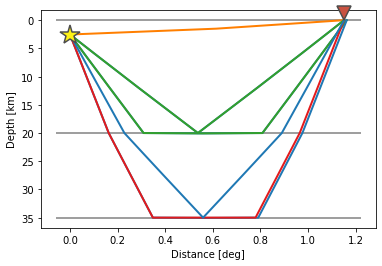

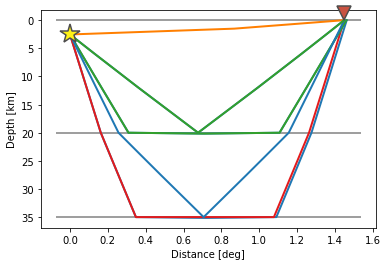

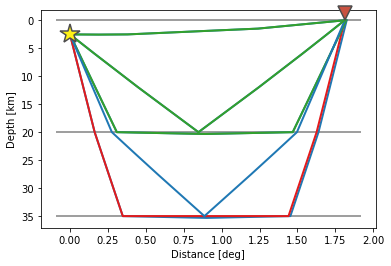

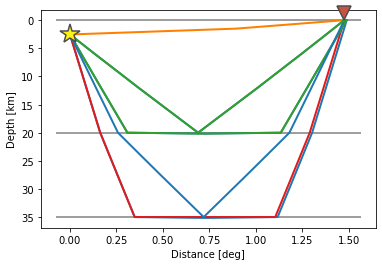

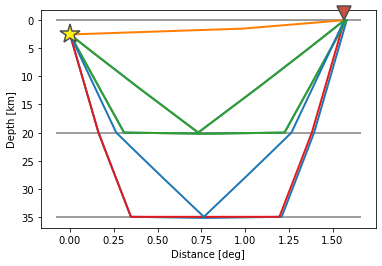

In [45]:
#calculate ray paths to each station and plot cross section in cartesian coordinates
for distdeg in distance[0:5]: #iterate through the first 5 distances in degrees between stations and epicenter
    arrivals = model.get_ray_paths(source_depth_in_km=origin.depth/1000, distance_in_degree=distdeg, phase_list=['p', 'P', 'Pg', 'Pn']) #get ray paths for a defined set of phases
    ax = arrivals.plot_rays(plot_type="cartesian", phase_list=['p', 'P', 'Pg', 'Pn']) #plot rays in cartesian coordinates

### 3: Download the data for each of the stations for the event in question, and plot the vertical components with respect to the arrival time.


In [46]:
#import necessary modules
from obspy.clients.fdsn import Client
client2 = Client()

from obspy import Stream

from obspy.taup import TauPyModel
model = TauPyModel(model="ak135")

from obspy.geodetics import locations2degrees

There are two ways to approach this question, depending on how the wording is interpreted. 
* First, one could simply plot each waveform relative to the origin time. With increasing distance from the epicenter, the first arrival would migrate further along the x-axis
* Second, one could plot the waveform relative to the arrival time at that station. In this case, the first arrival would be at a fixed distance along the x-axis for all plots

In [49]:
#request each trace relative to a fixed origin time.
stream = Stream()
for network in inventory: #iterate through networks in the inventory
    for station in network: #iterate through stations in each network within the inventory
        try:
            #define a temporary stream object to get waveforms from inventory for all networks, all stations, all location codes, and only the high gain, vertical component channels /
            #starting 30 seconds before the earthquake, ending 5 mins after the earthquake
            streamtemp = client2.get_waveforms(network.code, station.code, "*", "*HZ", origin.time - 30, origin.time + 5 * 60, attach_response=True)
            #further limit the stream object to be only the first trace retrieved for each station (assumed to be the best trace). += means we are adding to the stream object every iteration
            stream += streamtemp[0]
        except:
            pass
print(stream)

28 Trace(s) in Stream:

7C.MM04..BHZ | 2017-05-01T14:17:45.300001Z - 2017-05-01T14:23:15.275001Z | 40.0 Hz, 13200 samples
...
(26 other traces)
...
TA.S31K..BHZ | 2017-05-01T14:17:45.300001Z - 2017-05-01T14:23:15.275001Z | 40.0 Hz, 13200 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [50]:
#request each trace relative to the arrival time at that station
stream2 = Stream()
for network in inventory: #iterate through networks in the inventory
    for station in network: #iterate through stations in each network within the inventory
        try:
            #calculate distance in degrees between each station and the event origin
            distance_degrees = locations2degrees(origin.latitude, origin.longitude, station.latitude, station.longitude)
            #calculate travel times for the distance in degrees for that station. Note, we are using same velocity model as above: ak135
            arrivals = model.get_travel_times(source_depth_in_km=origin.depth/1000, distance_in_degree=distance_degrees, phase_list=['p', 'P', 'Pg', 'Pn'])
            #define the first arrival as the time attribute of the arrival object
            firstarrival = arrivals[0].time
            #define the arrival time in UTC as the event time + the first arrival time
            arrivaltime = origin.time + firstarrival
            #define a temporary stream object to get waveforms from inventory for all networks, all stations, all location codes, and only the high gain, vertical component channels /
            #starting 30 seconds before the arrival time, ending 5 mins after the arrival time
            streamtemp2 = client2.get_waveforms(network.code, station.code, "*", "*HZ", arrivaltime - 30, arrivaltime + 5 * 60, attach_response=True) #change these to the arrival times computed above
            #further limit the stream object to be only the first trace retrieved for each station (assumed to be the best trace). += means we are adding to the stream object every iteration
            stream2 += streamtemp2[0]  
        except:
            pass
print(stream2)

28 Trace(s) in Stream:

7C.MM04..BHZ | 2017-05-01T14:18:07.375000Z - 2017-05-01T14:23:37.350000Z | 40.0 Hz, 13200 samples
...
(26 other traces)
...
TA.S31K..BHZ | 2017-05-01T14:18:18.425001Z - 2017-05-01T14:23:48.400001Z | 40.0 Hz, 13200 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


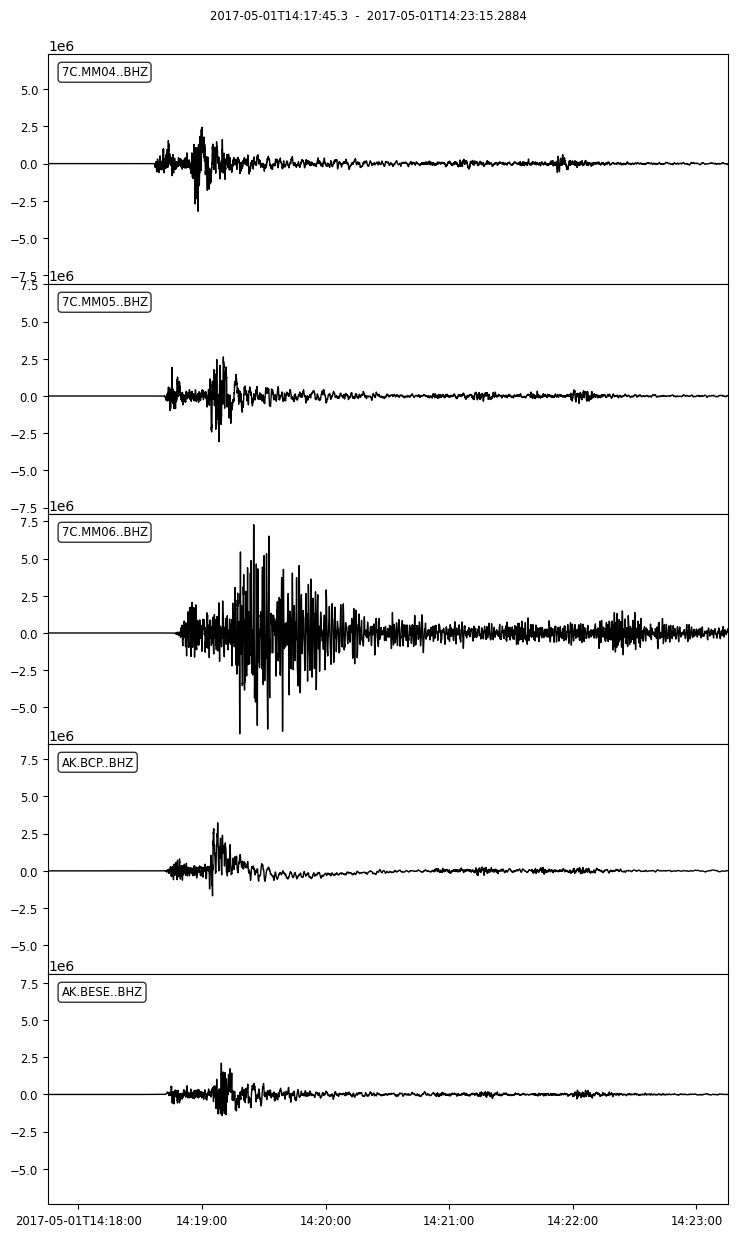

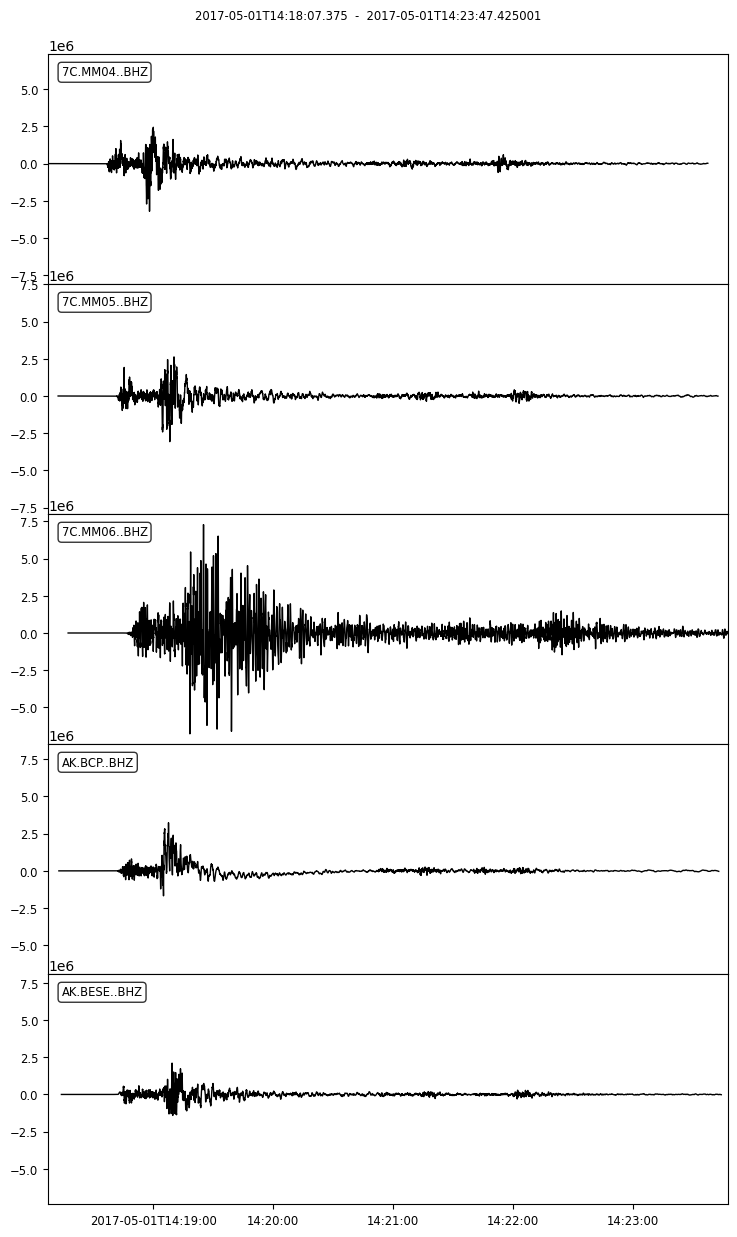

In [51]:
stream[0:5].plot(); #plot first 5 traces from the stream fixed relative to origin time
stream2[0:5].plot(); #plot first 5 traces from the stream fixed relative to the arrival time at that station

### 4: Use the event location to instead plot a record section sorted by distance from the event, to see the moveout of the signals




In [52]:
from obspy.geodetics import gps2dist_azimuth
from obspy import Stream

In [79]:
stream3 = Stream()
for network in inventory: #iterate through each network in inventory
    for station in network: #iterate through each station in network
        try:
            #define a temporary stream object to get waveforms from inventory for all networks, all stations, all location codes, and only the high gain, vertical component channels /
            #starting at event time, ending 5 mins after the event time. IMPORTANT TO START AT THE EVENT TIME, NOT OFFSET, otherwise record section will be wrong
            streamtemp3 = client2.get_waveforms(network.code, station.code, "*", "*HZ", origin.time, origin.time + 5 * 60, attach_response=True)
            #calculate the distance in meters between the station and the event location
            distance_meters = gps2dist_azimuth(station.latitude, station.longitude, origin.latitude, origin.longitude)[0]
            #attach the distance in meters to the stats for each item in the stream object
            streamtemp3[0].stats.distance = distance_meters
            #further limit the stream object to be only the first trace retrieved for each station (assumed to be the best trace). += means we are adding to the stream object every iteration
            stream3 += streamtemp3[0]   
        except:
            pass
print(stream3)

28 Trace(s) in Stream:

7C.MM04..BHZ | 2017-05-01T14:18:15.300000Z - 2017-05-01T14:23:15.275000Z | 40.0 Hz, 12000 samples
...
(26 other traces)
...
TA.S31K..BHZ | 2017-05-01T14:18:15.300001Z - 2017-05-01T14:23:15.275001Z | 40.0 Hz, 12000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


Now we can use the type="section" argument to plot a Record Section

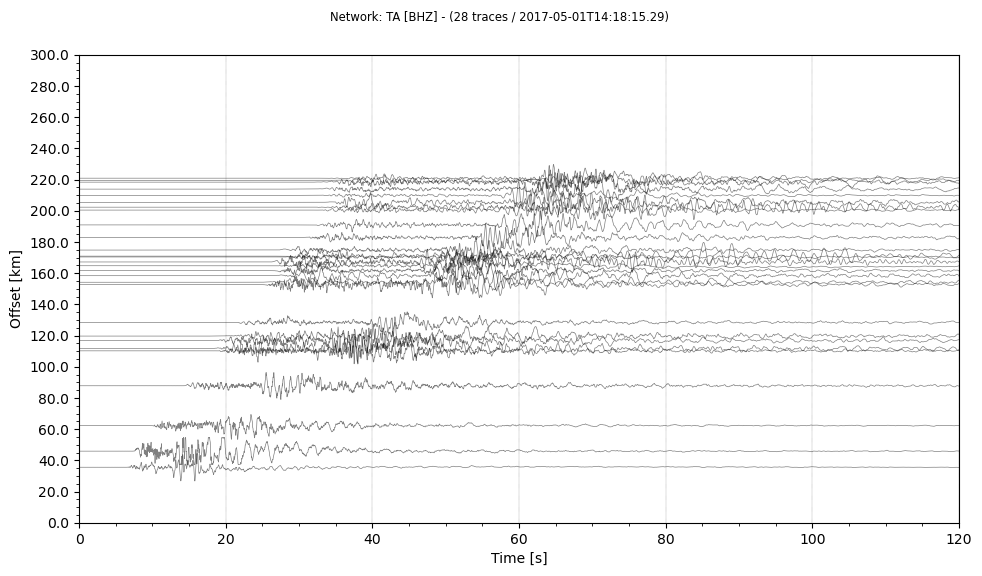

In [85]:
stream3.plot(type='section', plot_dx=20e3, recordlength=120, time_down=True, scale=2, linewidth=.5, grid_linewidth=.25, orientation='horizontal');

### 5: Pick a station and event, and plot the raw vertical component, plot a low passed version, high passes version, and band passed version of the data.


1 Trace(s) in Stream:
CN.PLBC..HHZ | 2017-05-01T14:17:45.290000Z - 2017-05-01T14:20:45.290000Z | 100.0 Hz, 18001 samples


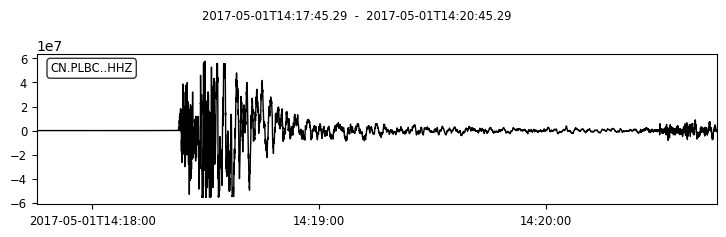

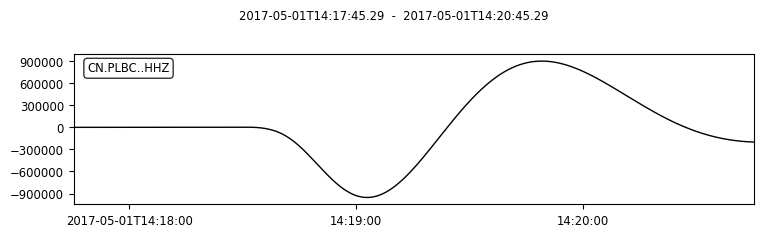

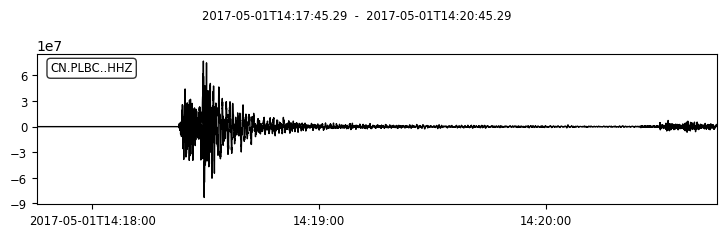

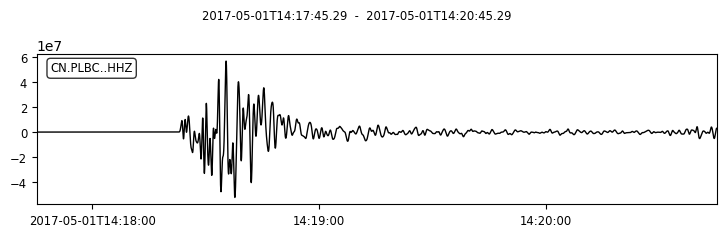

In [88]:
#define which trace I want to request
net = 'CN'
sta = 'PLBC'
loc = '*'
chan = 'HHZ'

#request waveform data for specific channel of station
stream4 = client.get_waveforms(net, sta, loc, chan, origin.time - 30, origin.time + 5 * 30)
print(stream4)

#plot the raw vertical component
stream4.plot();

#apply low pass filtering   
st_lowpass = stream4.copy() #make copy of raw data to apply filter to
st_lowpass.filter('lowpass', freq=0.01) #apply lowpass filter, attenuating anything above 0.0001Hz, passing anything below
st_lowpass.plot(); #plot filtered trace

st_highpass = stream4.copy() #make copy of raw data to apply filter to
st_highpass.filter('highpass', freq=1) #apply highpass filter, attenuating anything below 1Hz, passing anything above
st_highpass.plot(); #plot filtered trace

st_bandpass = stream4.copy() #make copy of raw data to apply filter to
st_bandpass.filter('bandpass', freqmin=0.001, freqmax=1) #apply bandpass filter, attenuating anything outside of 0.0001-1Hz, passing anything between
st_bandpass.plot(); #plot filtered trace

### 6: Plot a spectrogram of the same event as in 5, and look at what energy you see in the filtered versions of the data compared to the spectrogram


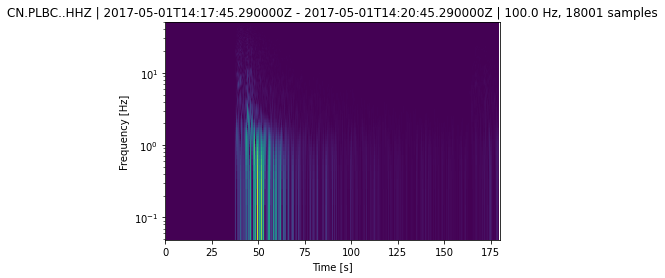

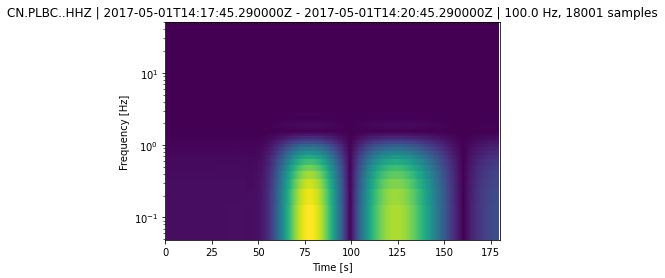

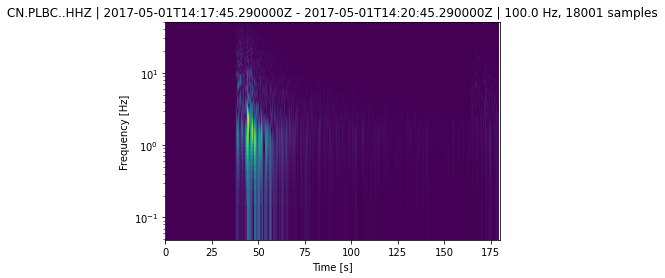

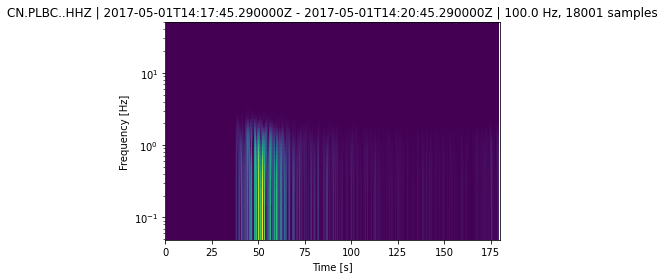

In [90]:
#plot spectrograms of raw, low pass, highpass, and bandpass waveforms with logarithmic y-axes
stream4.spectrogram(log=True)
st_lowpass.spectrogram(log=True)
st_highpass.spectrogram(log=True)
st_bandpass.spectrogram(log=True);

### 7: for this cluster of stations, plot a map of local seismicity (client get_events function). pick an event with a moment tensor (will have to be found externally), and plot a focal mechanism on top of the map of seismicity.

First we need to request a full catalog for the area of interest using the get_events function

In [91]:
from obspy import UTCDateTime


t1 = UTCDateTime("2000-01-01T00:00:00")
t2 = UTCDateTime("2022-01-01T00:00:00")
#get events from the ISC catalog between 1985 and 2022 within a 3 degree radius of the M6.2 event of interest
fullcatalog = client.get_events(starttime=t1, endtime=t2, longitude=origin.longitude, latitude=origin.latitude, minradius=0, maxradius=3, minmagnitude=2, catalog="ISC")
print(fullcatalog)

#fullcatalog.plot(projection="local", resolution="f", continent_fill_color="wheat", water_fill_color="lightblue", label=None);

4575 Event(s) in Catalog:
2015-08-30T08:56:50.520000Z | +58.411, -137.027 | 2.3 ML
2015-08-29T19:36:14.240000Z | +58.596, -137.498 | 2.6 ML
...
2000-01-06T10:42:25.330000Z | +58.134, -136.934 | 6.1 Mw
2000-01-02T05:42:41.800000Z | +58.776, -136.473 | 2.5 ML
To see all events call 'print(CatalogObject.__str__(print_all=True))'


Again, we need to write to a tabulated format in order to plot with PyGMT

In [92]:
fullcatalog.write("EQcatalog_2000-2022.shp", format="SHAPEFILE")

Run the following GDAL command in the terminal:

In [ ]:
# ogr2ogr -f csv EQcatalog_2000-2022.csv EQcatalog_2000-2022.shp

In [94]:
#import necessary modules
import pandas as pd
import pygmt

Can retrieve focal mechanism information from the event from the USGS event page: https://earthquake.usgs.gov/earthquakes/eventpage/us10008mgu/moment-tensor

In [95]:
# store focal mechanisms parameters in a dict
focal_mechanism = dict(strike=282, dip=76, rake=23, magnitude=6.3)
# read the earthquake catalog from the csv previous created
quakes = pd.read_csv("EQcatalog_2000-2022.csv", skipinitialspace=True)

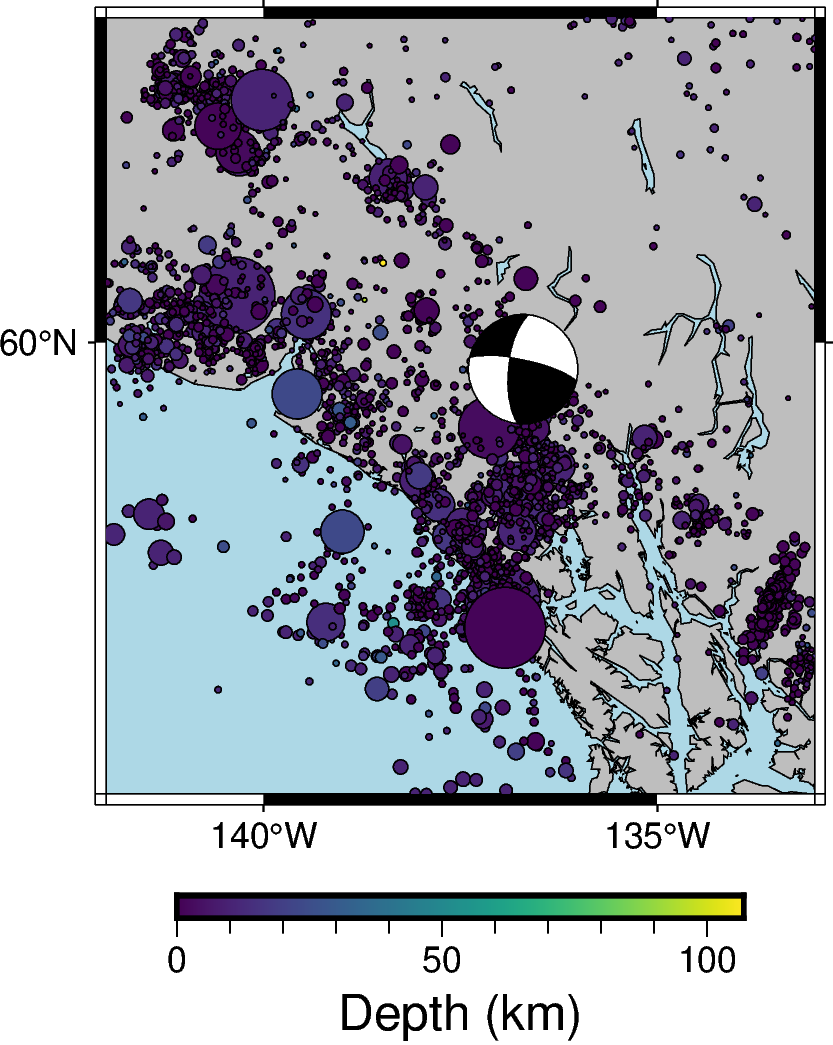

In [115]:
fig = pygmt.Figure()
#make colour palette for catalog depth range
pygmt.makecpt(cmap="viridis", series=[quakes.Depth.min(), quakes.Depth.max()])
#plot coast for region of interest
fig.coast(region=[-142, -133, 57, 62], projection="M6c", land="grey", water="lightblue", shorelines=True, frame="a")
#plot earthquakes from catalog scaled by a power law according to magnitude, and coloured according to depth
fig.plot(x=quakes.Longitude, y=quakes.Latitude, size=0.01 * (2 ** quakes.Magnitude), color=quakes.Depth, cmap=True, style="cc", pen="black")
#define the scale of the focal mecanism using the same power law as previously applied to the catalog - NOT SURE IF THIS IS ACTUALLY ACCURATELY APPLYING THE SAME SCALE
meca_scale = str(0.01 * (2 ** 6.2)) + "c"
#plot focal mecanism at event location, scaled the same as the earthquake catalog
fig.meca(focal_mechanism, scale=meca_scale, longitude=origin.longitude, latitude=origin.latitude, depth=2.5)
#make colour bar for depth
fig.colorbar(frame='af+l"Depth (km)"')
fig.show()